# Image preprocessing
predspracovanie obrázkov, môžem použiť tradičné metódy spracovania obrazu

 - do README dať komentár, obrázok, zdrojový kód, po anglicky/slovensky, vysvetliť čo sa stalo prečo som to tak použil

## Morfologické operácie
cieľ 1: vysegmentovať jednotlivé bunky, použijeme operácie na spracovanie obrazu  
cieľ 2: kontúrové analýzy, ale prv binarizovať obrázky, po kontúrových analýzach môžme zisťovať obsahy

 - operácia dilatácie na binárny obrázok
 - opencv - dilatácia, erosion
 - dilatácia - bielie objekty na čiernom pozadí sa mi úmerne zväčšia podľa jadra
 - erózia - opak dilatácie, z bielych plôch binarizovaného obrázku sa mi odfrézuje po okrajoch objektoch, zmenší sa ich plocha
 - opening - kombinácia predchádzajúcich dvoch, objekt zostáva v pôvodnej veľkosti narozdiel od dilatácie a erózie, vo vstupe je záliv, zliate 2 jadierka, s týmto ich oddelíme
 - closing - kombinované, objekt zostáva v pôvodnej veľkosti narozdiel od dilatácie a erózie, ale zálivy/prepojenia zalejeme
 - morfologický gradient - rozdiel medzi základnými operáciami erózie a dilatácie, obrázok erodujem a dilatujem a obrázky spravím rozdiel a dostávam hranový obrázok, môžno použiť na detekciu hrán

## Filtrácia
 - blurovací filter - mean filter, gauss filter, dôležitá veľkosť jadra
 - kombinácia jednotlivých operácií, ktorá privedie k priostreniu hrán - vyrobím si jemný hranový obrázok a ten aditívne/subtratívne pripočítam/odpočítam k pôvodnému a priostrým hrany
 - canny edge detection - algoritmus, nie je to jednoduchý filter, je to postupnosť jednotlivých krokov, ktorá vedie k tomu, že v obraze sa vyhľadávajú hrany a tie sa bianrizujú, výstupom sú už kontúry, nie len jednoduchý hranový obrázok, podľa thresholdu je buď viac alebo menej zachytených hrán
 - bilaterárny filter - implementované v opencv, veľmi pomalý, na velkých obrázkoch to nie je v milisekundách, musíme počkať

In [2]:
import cv2
from matplotlib import pyplot as plt

print(cv2.__version__)

4.7.0


## 1. Load image
Define function to show images:

In [3]:
def show_img(img, txt: str):
    """
    Show images
    :param: img - image
    :param: txt - text of a window
    """
    cv2.imshow(txt, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


načítanie obrázkov:

In [4]:
img1 = cv2.imread('/home/erik/FIIT/2_Ing/2_semester/PVID/cvicenia/figures/TCGA-18-5592-01Z-00-DX1.tif')
img2 = cv2.imread('/home/erik/FIIT/2_Ing/2_semester/PVID/cvicenia/figures/TCGA-21-5784-01Z-00-DX1.tif')
img3 = cv2.imread('/home/erik/FIIT/2_Ing/2_semester/PVID/cvicenia/figures/TCGA-21-5786-01Z-00-DX1.tif')

show_img(img1, 'image')
show_img(img2, 'image')
show_img(img3, 'image')

Qt: Session management error: None of the authentication protocols specified are supported


In [5]:
# percent by which the image is resized
scale_percent = 50

# calculate the 50 percent of original dimensions
width = int(img1.shape[1] * scale_percent / 100)
height = int(img1.shape[0] * scale_percent / 100)

# dsize
dsize = (width, height)

img1_resize = cv2.resize(img1, dsize)
show_img(img1_resize, 'image')

In [6]:
img1_grayscale = cv2.cvtColor(img1_resize, cv2.COLOR_BGR2GRAY)
img2_grayscale = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img3_grayscale = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

show_img(img1_grayscale, 'image')
show_img(img2_grayscale, 'image')
show_img(img3_grayscale, 'image')

<Figure size 640x480 with 0 Axes>

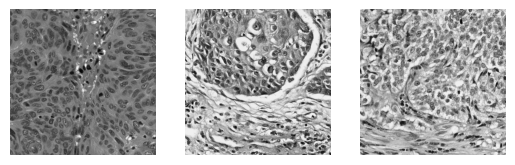

In [7]:
plt.figure()
f, axarr = plt.subplots(1,3)

axarr[0].imshow(img1_grayscale, cmap = 'gray')
axarr[1].imshow(img2_grayscale, cmap = 'gray')
axarr[2].imshow(img3_grayscale, cmap = 'gray')

axarr[0].axis('off')
axarr[1].axis('off')
axarr[2].axis('off')

plt.show()
# 255, 255, 0 -  R G B

## 2. Image pre-processing
Resampling
 - môžem aj výrezy spraviť, patche

In [ ]:
# vyššie rpesunuté

Noise removal - odstránenie šumu blurovaním obrázka  
Averaging - blur filter

In [8]:
img1_blur = cv2.blur(img1_grayscale, (5,5))
show_img(img1_blur, 'image')

Gaussian Blurring

In [9]:
img1_gauss = cv2.GaussianBlur(img1_grayscale, (5,5), 0)
show_img(img1_gauss, 'image')

Median Blurring

In [10]:
img1_median = cv2.medianBlur(img1_grayscale, 5)
show_img(img1_median, 'image')

Bilateral Filtering

In [11]:
img1_bilateral = cv2.bilateralFilter(img1_grayscale, 9, 75, 75)
show_img(img1_bilateral, 'image')

Sharpening  
You may try image sharpening according to lectures by using cv::Laplace or cv::blur

## 3. Binarization
Thresholding  
cv::threshold - simple binary threshold

In [12]:
retValue, img1_threshold = cv2.threshold(img1_gauss, 127, 255, cv2.THRESH_BINARY)

show_img(img1_threshold, 'threshold')

OTSU

In [13]:
retValue, img1_otsu = cv2.threshold(img1_gauss, 0, 255, cv2.THRESH_OTSU)

show_img(img1_otsu, 'threshold')

cv::adaptiveThreshold - adaptive method using threshold computed from local area

In [14]:
img1_adaptiveThreshold = cv2.adaptiveThreshold(img1_gauss, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 0)

show_img(img1_adaptiveThreshold, 'threshold')

cv::inrange - range based binarization method

In [15]:
img1_inrange = cv2.inRange(img1_gauss, 127, 255)
show_img(img1_inrange, 'threshold')

<Figure size 640x480 with 0 Axes>

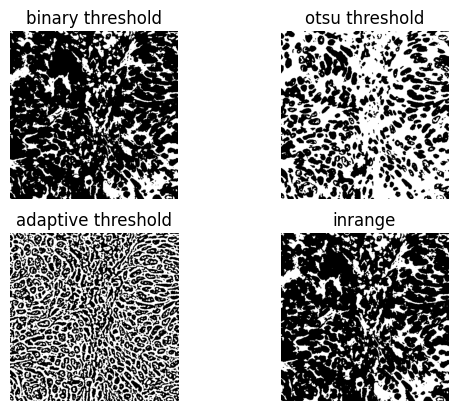

In [16]:
plt.figure()
f, axarr = plt.subplots(2,2)

axarr[0][0].imshow(img1_threshold, cmap = 'gray')
axarr[0][1].imshow(img1_otsu, cmap = 'gray')
axarr[1][0].imshow(img1_adaptiveThreshold, cmap = 'gray')
axarr[1][1].imshow(img1_inrange, cmap = 'gray')


axarr[0][0].set_title('binary threshold')
axarr[0][1].set_title('otsu threshold')
axarr[1][0].set_title('adaptive threshold')
axarr[1][1].set_title('inrange')

axarr[0][0].axis('off')
axarr[0][1].axis('off')
axarr[1][0].axis('off')
axarr[1][1].axis('off')

plt.show()

Edge filter  
cv::Sobel, cv::Laplace - edge filters  

sobel - input 8 bitový obrázok, sobel aj záporne aj kladné číslo, potreba nejaký short integer, pri vizualizácií si rozmyslieť, či chceme mať celý rozsah 0 šedú alebo spraviť absolútnu hodnotu, ide ptm všetko do bieleho, je to viac ako 8 bitov

In [17]:
img1_sobel = cv2.Sobel(src=img1_gauss, ddepth=-1, dx=0, dy=1, ksize=7)
grad_x = cv2.Sobel(src=img1_gauss, ddepth=-1, dx=1, dy=0, ksize=3)

# Gradient-Y
# grad_y = cv.Scharr(gray,ddepth,0,1)
grad_y = cv2.Sobel(src=img1_gauss, ddepth=-1, dx=0, dy=1, ksize=3)

abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)


grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
show_img(grad, 'sobel')

In [18]:
img1_laplac = cv2.Laplacian(src=img1_gauss, ddepth=-1, ksize=7)
show_img(img1_laplac, 'laplac')

cv::Canny - full edge detection algorithm

In [19]:
img1_canny = cv2.Canny(img1_gauss, 30, 100)
show_img(img1_canny, 'img')

<Figure size 640x480 with 0 Axes>

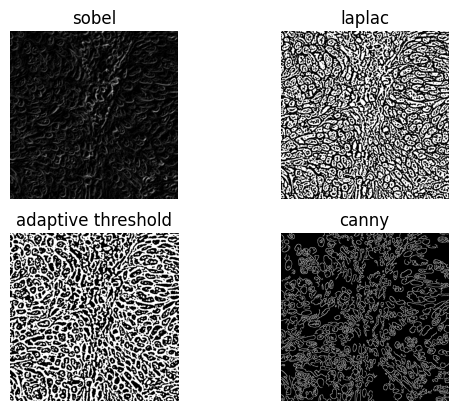

In [20]:
plt.figure()
f, axarr = plt.subplots(2,2)

axarr[0][0].imshow(grad, cmap = 'gray')
axarr[0][1].imshow(img1_laplac, cmap = 'gray')
axarr[1][0].imshow(img1_adaptiveThreshold, cmap = 'gray')
axarr[1][1].imshow(img1_canny, cmap = 'gray')


axarr[0][0].set_title('sobel')
axarr[0][1].set_title('laplac')
axarr[1][0].set_title('adaptive threshold')
axarr[1][1].set_title('canny')

axarr[0][0].axis('off')
axarr[0][1].axis('off')
axarr[1][0].axis('off')
axarr[1][1].axis('off')

plt.show()

## 4. Bubble segmentation
Morphological operations

    cv::dilate, cv::erode

In [21]:
img1_dilate = cv2.dilate(img1_canny,(-1, -1), 3)
show_img(img1_dilate, 'img1_dilate')

In [22]:
img1_erode	= cv2.erode(img1_canny, kernel=(3,3))
show_img(img1_erode, 'img1_erode')

<Figure size 640x480 with 0 Axes>

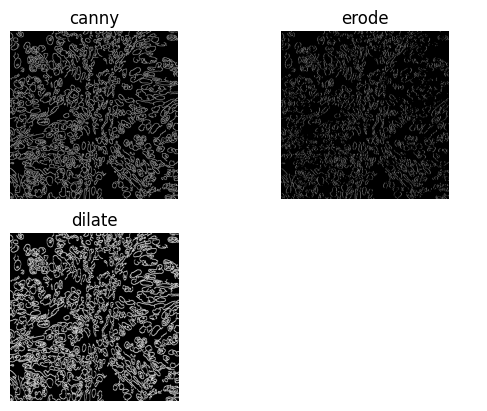

In [23]:
plt.figure()
f, axarr = plt.subplots(2,2)

axarr[0][0].imshow(img1_canny, cmap = 'gray')
axarr[0][1].imshow(img1_erode, cmap = 'gray')
axarr[1][0].imshow(img1_dilate, cmap = 'gray')

axarr[0][0].set_title('canny')
axarr[0][1].set_title('erode')
axarr[1][0].set_title('dilate')

axarr[0][0].axis('off')
axarr[0][1].axis('off')
axarr[1][0].axis('off')
axarr[1][1].axis('off')

plt.show()

Distance transform

    cv::distanceTransform

In [24]:
img1_distanceTransform = cv2.distanceTransform(src=img1_canny, distanceType=cv2.DIST_L2, maskSize=5)
show_img(img1_distanceTransform, 'img1_distanceTransform')

<Figure size 640x480 with 0 Axes>

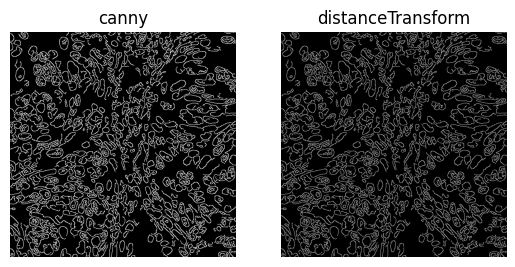

In [25]:
plt.figure()
f, axarr = plt.subplots(1,2)

axarr[0].imshow(img1_canny, cmap = 'gray')
axarr[1].imshow(img1_distanceTransform, cmap = 'gray')

axarr[0].set_title('canny')
axarr[1].set_title('distanceTransform')

axarr[0].axis('off')
axarr[1].axis('off')

plt.show()

Contours analysis

    cv::findContours - extracts contours from binary image

    cv::drawContours - draws contours

    contour filtering useful functions - cv::area, cv::boundingRect

In [26]:
result = img1_resize.copy()

img1_contours, img1_hierarchy = cv2.findContours(img1_dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

#image.copyTo(result);
cellIndex_img1 = 0

for i in range(0, len(img1_contours)):
   if cv2.contourArea(img1_contours[i]) > 10:
      cellIndex_img1 += 1
      centerX = 0.0
      centerY = 0.0

      for p in img1_contours[i]:
         # print(p[0])
         centerX += p[0][0] # x
         centerY += p[0][1] #.y

      cv2.drawContours(img1_resize, img1_contours, i, (0, 255, 0), 4)
      #result = cv2.putText(
      #  result, str(bananaIndex), 
      #  (int(centerX / len(img1_contours[i])), int(centerY / len(img1_contours[i]))), 
      #  cv2.FONT_HERSHEY_PLAIN, 4, (255, 0, 0), 4
      #  )
   i += 1

show_img(result, 'img1')
# show_img(oranges_grayscale, 'orange')
print("count:", cellIndex_img1)

count: 271


<Figure size 640x480 with 0 Axes>

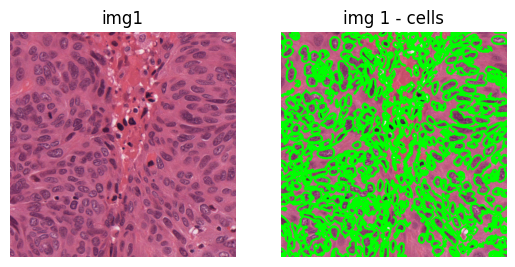

In [28]:
plt.figure()
f, axarr = plt.subplots(1,2)

img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1_result_rgb = cv2.cvtColor(img1_resize, cv2.COLOR_BGR2RGB)

axarr[0].imshow(img1_rgb)
axarr[1].imshow(img1_result_rgb)

axarr[0].set_title('img1')
axarr[1].set_title('img 1 - cells')

axarr[0].axis('off')
axarr[1].axis('off')

plt.show()